# **IA006–Exercícios de Fixação de Conceitos**

$~$

## **EFC3 - 2s2019**

$~$

### **Parte 1 - Revisitando algoritmo de retropropagação do erro**

Dado o exposto no exercício e definindo as seguintes variáveis intermediárias:

$Z$ = Camada intermediária da rede.

$outZ$ = Saída da camada Z (de acordo com a função de ativação).

$inpZ$ = Entrada da camada Z (amostras de entrada).

$\hat y$ = Ground true

De forma geral temos por conseguinte a seguinte derivação para a retropopagação do erro para qualquer $v_{n}$.

$\frac{\partial J}{\partial v_{n}} = \frac{\partial J}{\partial outZ}\frac{\partial outZ}{\partial inpZ}\frac{\partial inpZ}{\partial v_n}$

No caso específico para $v_{12}$ temos:

$\frac{\partial J}{\partial v_{12}} = \frac{\partial J}{\partial outZ}\frac{\partial outZ}{\partial inpZ}\frac{\partial inpZ}{\partial v_{12}}$

Realizando as derivadas expostas acima:

$\frac{\partial J}{\partial outZ} = \sum_{n=1}^N(\hat y - y)
w_n$

$\frac{\partial outZ}{\partial inpZ} = f(.)$

$\frac{\partial inpZ}{\partial v_n} = x_n$

Entãão para $v_{12}$:

$\frac{\partial J}{\partial outZ} = (\hat y_1 - y_1)w_{30} + (\hat y_2 - y_2)w_{31}$

$\frac{\partial outZ}{\partial inpZ} = f(.)$

$\frac{\partial inpZ}{\partial v_12} = x_1$


$~$

Finalmente:

$~$

$\frac{\partial J}{\partial v_{12}} = ((\hat y_1 - y_1)w_{30} + (\hat y_2 - y_2)w_{31}) \times f(.) \times x_1$

### **Parte 2 - Classificação binária com redes MLP e SVMs**

In [2]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.optimizers import SGD, RMSprop, Adam

In [3]:
treinamento = scipy.io.loadmat('dados_treinamento.mat')
validacao = scipy.io.loadmat('dados_val.mat')
teste = scipy.io.loadmat('dados_teste.mat')
# print(teste.keys())

In [4]:
x_treino = pd.DataFrame(treinamento["X"]).astype('float32')
y_treino = np.array(treinamento["y"]).ravel().astype('float32')
y_treino_view = y_treino
y_treino = pd.get_dummies(y_treino)

x_validacao = pd.DataFrame(validacao["Xval"]).astype('float32')
y_validacao = np.array(validacao["yval"]).ravel().astype('float32')
y_validacao_view = y_validacao
y_validacao = pd.get_dummies(y_validacao)

x_teste = pd.DataFrame(teste["Xt"]).astype('float32')
y_teste = np.array(teste["yt"]).ravel().astype('float32')
y_teste_view = y_teste
y_teste = pd.get_dummies(y_teste)

x_min, x_max = x_teste.to_numpy()[:, 0].min() - 1, x_teste.to_numpy()[:, 0].max() + 1
y_min, y_max = x_teste.to_numpy()[:, 1].min() - 1, x_teste.to_numpy()[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Apresentação dos dados, tanto de treinamento, validação e testes.

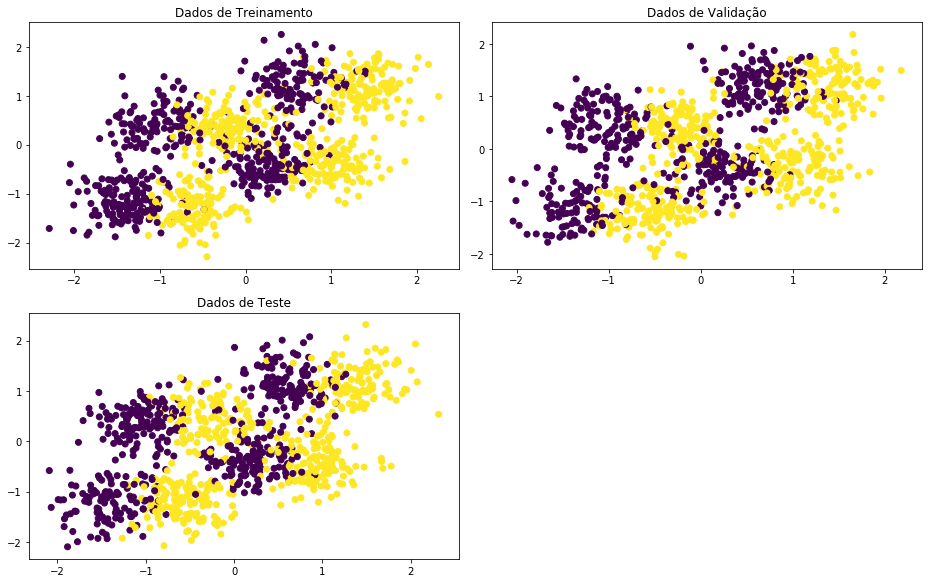

In [5]:
plt.figure(figsize=(13, 12))
plt.subplot(3, 2, 1)
plt.title("Dados de Treinamento")
plt.scatter(x_treino.to_numpy()[:, 0], x_treino.to_numpy()[:, 1], c=y_treino_view)
plt.subplot(3, 2, 2)
plt.title("Dados de Validação")
plt.scatter(x_validacao.to_numpy()[:, 0], x_validacao.to_numpy()[:, 1], c=y_validacao_view)
plt.subplot(3, 2, 3)
plt.title("Dados de Teste")
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view)
plt.tight_layout()
plt.show()

**a)** Nesta questão fora utilizado duas implementações de uma rede MLP, tendo como base praticamente os mesmos parâmetros para comparação.

Na primeira implementação foi usada a MLP fornecida pelo pacote scikit-learn [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), já na segunda, o pacote [Keras](https://keras.io/) foi selecionado e uma rede MLP com as mesmas características que a anterior foi criada.

In [6]:
# params = {
#     "hidden_layer_sizes": [(10, ), (25, ), (50, ), (100, ), (150, )],
#     "activation": ["logistic", "tanh", "relu"],
#     "solver": ["lbfgs", "sgd", "adam"],
#     "learning_rate": ["constant", "invscaling", "adaptive"],
#     "learning_rate_init": [1e-1, 1e-2, 1e-3, 1e-4],
#     "max_iter": [500]
# }

# clf = GridSearchCV(MLPClassifier(), params, cv=5, n_jobs=-1, verbose=5)
# clf.fit(x_treino, y_treino)
# print("Best params: ", clf.best_params_)

#### **Multi-Layer Perceptron (MLP)**

*1. MLPClassifier do scikit-learn*

Como mencionado a primeira implementação foi do scikit-learn. No caso a biblioteca jáá traz alguns hiperparâmetros ótimos já pré-preenchidos, os parâmetros usados:

 - Função de ativação: **ReLU**
 - Qtd. Unidades (Neurônios): **100**
 - Qtd. Camadas: **1**
 - Qtd. Máx. Épocas: **500**
 - Learning rate ($\alpha$): **0.001**
 - Algoritmo Iterativo (optimizer): **Adam**
 - Batch size: **32**

Todos os outros parâmetros não foram alterados.

Abaixo é apresentado todos os parâmetros que o classificador possui... claro, que conforme descrito na biblioteca alguns deles só são ativados caso da escolha de algum outro específico.

In [7]:
md = MLPClassifier(**{
    'activation': 'relu',
    'hidden_layer_sizes': (100, ),
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'batch_size': 32,
    'max_iter': 500,
    'solver': 'adam',
    'random_state': 1
})
md.fit(x_treino, y_treino_view)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Ao realizar a execução, obteve-se a seguinte curva de erro:

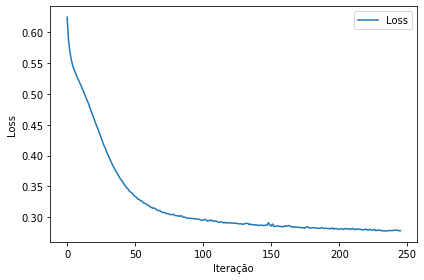

In [8]:
plt.plot(md.loss_curve_, label="Loss")
plt.legend()
plt.xlabel("Iteração")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

Consequente a isso, abaixo é apresentado o resultado da execução do classificador nos dados de teste.

Acurácia:
87.4%

Classification report:
              precision    recall  f1-score   support

          C1       0.87      0.88      0.87       499
          C2       0.88      0.87      0.87       501

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



(1.5, -0.5)

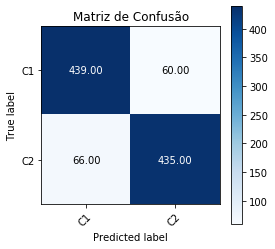

In [9]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

As regiões de decisão do classificador MLPClassifier.

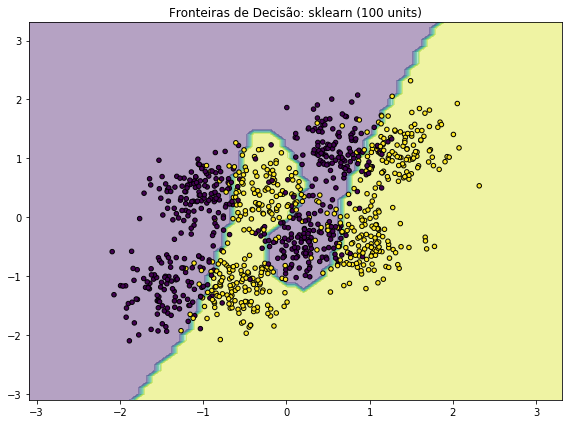

In [10]:
Z = md.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão: sklearn (100 units)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

*2. Rede Neural do Keras*


Tendo em vista a real dificuldade de utilização do conjunto de validação (o qual fora disponibilizado) com o classificador da biblioteca do scikit-learn, optou-se também pelo uso (conforme mencionado) do framework Keras.

No caso da Rede Neural construída usando Keras, partiu-se do princípio de replicar a mesma estrutura com os mesmos parâmetos usados no classificador do scikit-learn.

Dessa maneira temos a seguinte estrutura da Rede:

In [11]:
# optimizer = SGD(lr=1e-3, momentum=0.9, nesterov=True)
# optimizer = RMSprop(lr=1e-3)
optimizer = Adam(lr=1e-3, amsgrad=False)

model = Sequential(name="Multi Layer Perceptron")
model.add(Dense(units=100, activation='relu', input_dim=2, name="Input_Layer"))
model.add(Dense(units=2, activation='softmax', name="Output_Layer"))
model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

print()
print("_" * 65)
print("Optimizer: ")
for key, value in optimizer.get_config().items():
    try:
        value = np.round(value, 5)
    except:
        pass
    print(f"- {key}: {value}")

Model: "Multi Layer Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               300       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 202       
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
None

_________________________________________________________________
Optimizer: 
- learning_rate: 0.001
- beta_1: 0.9
- beta_2: 0.999
- decay: 0.0
- epsilon: 0.0
- amsgrad: False


Conjuntamente com essa estrutura fora utilizado:

 - Função de ativação: **ReLU**
 - Qtd. Unidades (Neurônios): **100**
 - Qtd. Camadas: **1**
 - Qtd. Máx. Épocas: **100**
 - Learning rate ($\alpha$): **0.001**
 - Algoritmo Iterativo (optimizer): **Adam**
 - Dados embaralhados: **Sim**
 - Batch size: **32**
 - Camada de saída: **2 unidades e softmax**

A escolha pelo softmax fora apenas para exercitar uma Rede Neural multiclasse padrão, no caso a camada de saída poderia ter como ativação a Função Logística (sigmoid).

In [15]:
history = model.fit(x_treino, y_treino,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    verbose=False,
                    validation_data=(x_validacao, y_validacao))

No caso do framework keras existe a possibilidade de avaliação do conjunto de validação conforme o andamento do aprendizado da Rede.

Os gráficos abaixo apresentam a Loss / Accuracy para os dados de treinamento e validação ao longos das épocas.

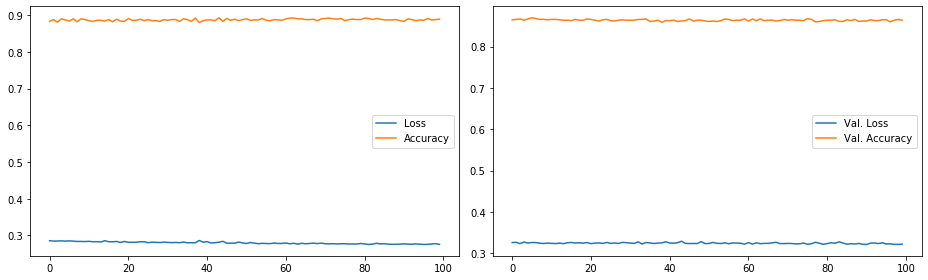

In [21]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Val. Loss")
plt.plot(history.history["val_accuracy"], label="Val. Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

E como anteriormente os dados referêntes a execução do modelo nos dados de testes.

Acurácia:
88.2%

Classification report:
              precision    recall  f1-score   support

          C1       0.88      0.88      0.88       499
          C2       0.88      0.88      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

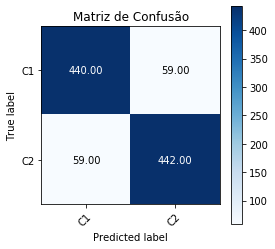

In [22]:
y_pred = np.argmax(model.predict(x_teste, batch_size=32), axis=1)
y_pred[y_pred == 0] = -1

print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

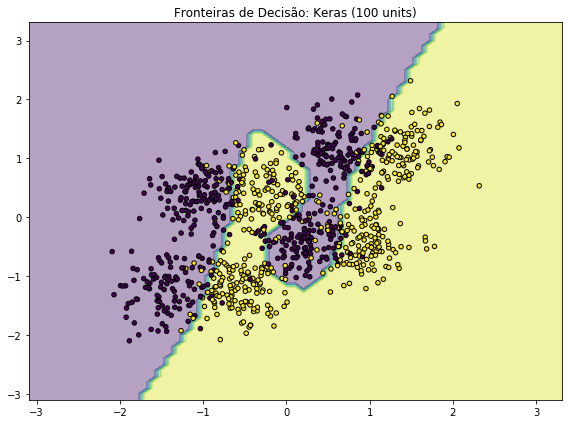

In [23]:
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()], batch_size=32), axis=1)
Z[Z == 0] = -1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão: Keras (100 units)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Como é possível notar a Rede Neural construída via Keras teve uma pequena melhor performance, provavelmente devido ao fato menor hiperparamentrização (a rede do scikit-learn pré-configura diversos outros parâmetros como por exemplo regularização). Também pode ser visto que a Rede via Keras converge mais rápido (menos épocas).

Será portanto utilizada a Rede do Keras para experimentar o uso de mais unidades (neurônios na camada intermediária). Para teste (e pensando na questão de uma Rede Neural ser um Aproximador Universal), aumentou-se de maneira relativamente expressiva a quantidade de unidades da camada intermediária para 32768 ao invés de 100.

O valor 32768 fora escolhido por ser múltiplo de 2 ($2^{15}$) e representar uma alta quantidade de neurônios.

Todos os outros parâmetros se mantiveram os mesmos.

In [24]:
# optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
# optimizer = RMSprop(lr=0.001)
optimizer = Adam(lr=1e-3, amsgrad=True)

model = Sequential(name="Multi Layer Perceptron")
model.add(Dense(units=32768, activation='relu', input_dim=2, name="Input_Layer"))
model.add(Dense(units=2, activation='softmax', name="Output_Layer"))
model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

print()
print("_" * 65)
print("Optimizer: ")
for key, value in optimizer.get_config().items():
    try:
        value = np.round(value, 5)
    except:
        pass
    print(f"- {key}: {value}")

Model: "Multi Layer Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 32768)             98304     
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 65538     
Total params: 163,842
Trainable params: 163,842
Non-trainable params: 0
_________________________________________________________________
None

_________________________________________________________________
Optimizer: 
- learning_rate: 0.001
- beta_1: 0.9
- beta_2: 0.999
- decay: 0.0
- epsilon: 0.0
- amsgrad: True


In [25]:
history = model.fit(x_treino, y_treino,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    verbose=False,
                    validation_data=(x_validacao, y_validacao))

Abaixo, os gráficos apresentando as curvas de Loss / Acurácia para os dados de treinamento e validação.

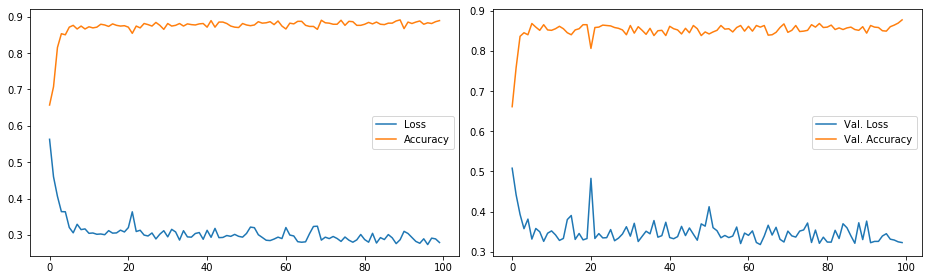

In [26]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Val. Loss")
plt.plot(history.history["val_accuracy"], label="Val. Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

Acurácia:
87.9%

Classification report:
              precision    recall  f1-score   support

          C1       0.88      0.87      0.88       499
          C2       0.88      0.88      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

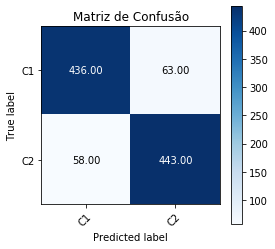

In [27]:
y_pred = np.argmax(model.predict(x_teste, batch_size=32), axis=1)
y_pred[y_pred == 0] = -1

print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

Por fim, as fronteiras de decisão geradas pela Rede com 32768 unidades.

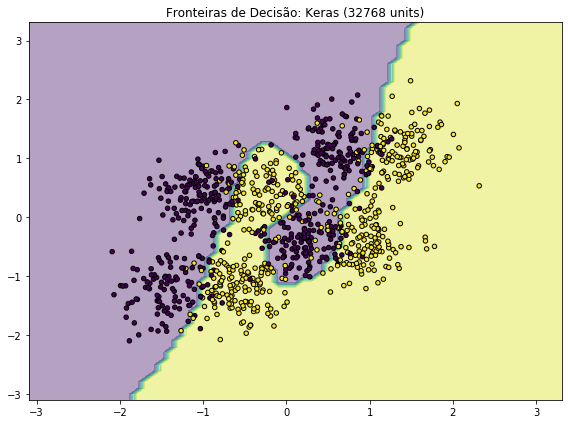

In [28]:
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()], batch_size=32), axis=1)
Z[Z == 0] = -1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão: Keras (32768 units)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Nota-se que o aumento na quantidade de unidades (neurônios) para a mesma arquitetura de rede, na verdade adicionou mais instabilidade para o algoritmo tentar aproximar melhor a função.

Tendo em vista essa dificuldade da Rede, a mesma fora reformulada para a seguinte arquitetura:

In [29]:
# optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
# optimizer = RMSprop(lr=0.001)
optimizer = Adam(lr=1e-3, amsgrad=True)

model = Sequential(name="Multi Layer Perceptron")
model.add(Dense(units=1024, activation='relu', input_dim=2, name="Input_Layer_1"))
model.add(Dense(units=1024, activation='relu', input_dim=1024, name="Input_Layer_2"))
model.add(Dense(units=1024, activation='relu', input_dim=1024, name="Input_Layer_3"))
model.add(Dense(units=1024, activation='relu', input_dim=1024, name="Input_Layer_4"))
model.add(Dense(units=1024, activation='relu', input_dim=1024, name="Input_Layer_5"))
model.add(Dense(units=1024, activation='relu', input_dim=1024, name="Input_Layer_6"))
model.add(Dense(units=2, activation='softmax', name="Output_Layer"))
model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

print()
print("_" * 65)
print("Optimizer: ")
for key, value in optimizer.get_config().items():
    try:
        value = np.round(value, 5)
    except:
        pass
    print(f"- {key}: {value}")

Model: "Multi Layer Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer_1 (Dense)        (None, 1024)              3072      
_________________________________________________________________
Input_Layer_2 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
Input_Layer_3 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
Input_Layer_4 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
Input_Layer_5 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
Input_Layer_6 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
Output_Layer (Dense)         (None, 2)      

In [30]:
history = model.fit(x_treino, y_treino,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    verbose=False,
                    validation_data=(x_validacao, y_validacao))

Abaixo segue os resultados... apresentados na mesma ordem que os anteriores.

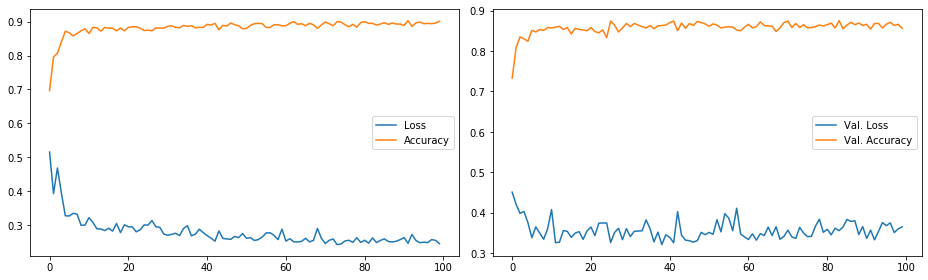

In [34]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Val. Loss")
plt.plot(history.history["val_accuracy"], label="Val. Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

Acurácia:
87.1%

Classification report:
              precision    recall  f1-score   support

          C1       0.86      0.89      0.87       499
          C2       0.89      0.85      0.87       501

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



(1.5, -0.5)

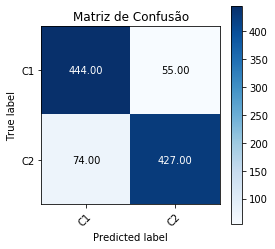

In [35]:
y_pred = np.argmax(model.predict(x_teste, batch_size=32), axis=1)
y_pred[y_pred == 0] = -1

print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

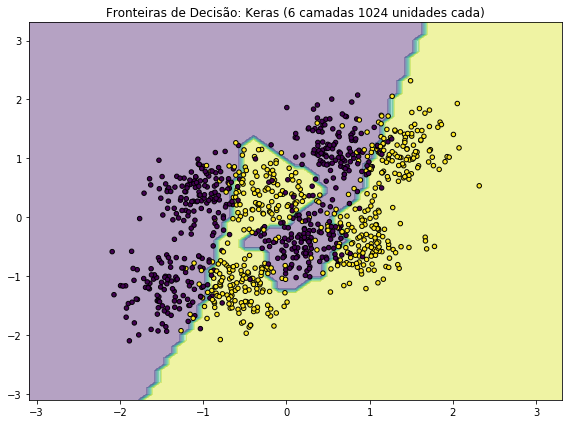

In [36]:
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()], batch_size=32), axis=1)
Z[Z == 0] = -1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão: Keras (6 camadas 1024 unidades cada)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Visto que aumentar a quantidade de unidades (neurônios) e a quantidade de camadas intermediárias não ajuda a resolver o problema, fica aqui demonstrado a quantidade mínima de unidades (neurônios) necessários para a solução do problema.

Faz-se uso do framework Keras.

In [37]:
# optimizer = SGD(lr=0.001, momentum=0.9, nesterov=True)
# optimizer = RMSprop(lr=0.001)
optimizer = Adam(lr=1e-3, amsgrad=True)

model = Sequential(name="Multi Layer Perceptron")
model.add(Dense(units=30, activation='relu', input_dim=2, name="Input_Layer_1"))
model.add(Dense(units=2, activation='softmax', name="Output_Layer"))
model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

print()
print("_" * 65)
print("Optimizer: ")
for key, value in optimizer.get_config().items():
    try:
        value = np.round(value, 5)
    except:
        pass
    print(f"- {key}: {value}")

history = model.fit(x_treino, y_treino,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    verbose=False,
                    validation_data=(x_validacao, y_validacao))

Model: "Multi Layer Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer_1 (Dense)        (None, 30)                90        
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 62        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
None

_________________________________________________________________
Optimizer: 
- learning_rate: 0.001
- beta_1: 0.9
- beta_2: 0.999
- decay: 0.0
- epsilon: 0.0
- amsgrad: True


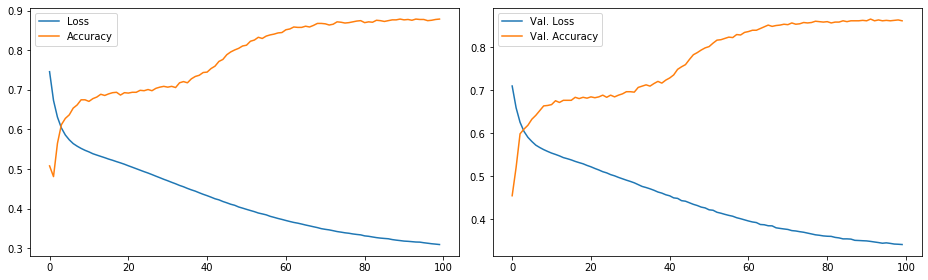

In [39]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Val. Loss")
plt.plot(history.history["val_accuracy"], label="Val. Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

Acurácia:
88.3%

Classification report:
              precision    recall  f1-score   support

          C1       0.88      0.89      0.88       499
          C2       0.89      0.88      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

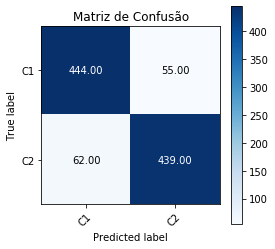

In [40]:
y_pred = np.argmax(model.predict(x_teste, batch_size=32), axis=1)
y_pred[y_pred == 0] = -1

print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

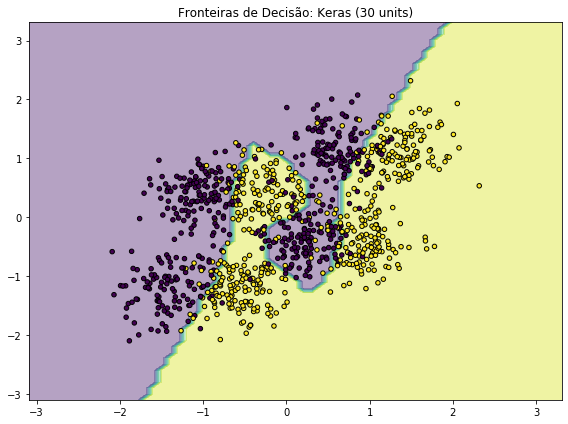

In [41]:
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()], batch_size=32), axis=1)
Z[Z == 0] = -1
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão: Keras (30 units)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Portanto, como demonstrado acima, uma quantidade de apenas 30 unidades (neurônios) já é capaz de resolver o problema com acurácia de >= 87%.

$~$

#### **Support Vector Machine (SVM)**

$~$
$~$

Para o caso do SVM, foi utilizado o kernel **rbf (Radial Basis Function)** o qual pode ser considerado uma aproximação de uma Rede Neural. Isso fica nítido no resultado apresentado.

Posteriormente, para fim de análise comparativa foi realizado o uso de um kernel polinomial de grau 3.

Além disso o valor hiperparâmetro *C* utilizado foi de 5. Nos testes realizados com o SVM esse valor foi médio, trazendo bons resultados e boa performance para treinar.

Abaixo segue as informações da execução do SVM usando *rbf* e *C=5*.

P.S.: Não foi alterado o parâmetro *gamma*.

In [42]:
# params = {
#     "kernel": ["rbf", "poly", "sigmoid"],
#     "degree": [3, 5, 6, 9],
#     "gamma": ["scale"],
#     "C": [1, 5, 10, 15, 20, 25, 30, 35, 40, 50]
# }

# clf = GridSearchCV(SVC(), params, cv=5, n_jobs=-1, verbose=5)
# clf.fit(x_treino, y_treino)
# print("Best params: ", clf.best_params_)

In [43]:
md = SVC(**{
    'C': 5,
    'gamma': 'scale',
    'kernel': 'rbf',
    'random_state': 1
})
md.fit(x_treino, y_treino_view)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Acurácia:
87.5%

Classification report:
              precision    recall  f1-score   support

          C1       0.87      0.89      0.88       499
          C2       0.88      0.86      0.87       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.87      1000
weighted avg       0.88      0.88      0.87      1000



(1.5, -0.5)

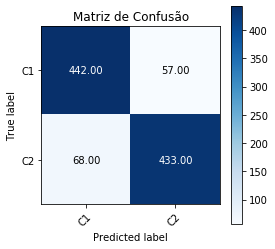

In [44]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

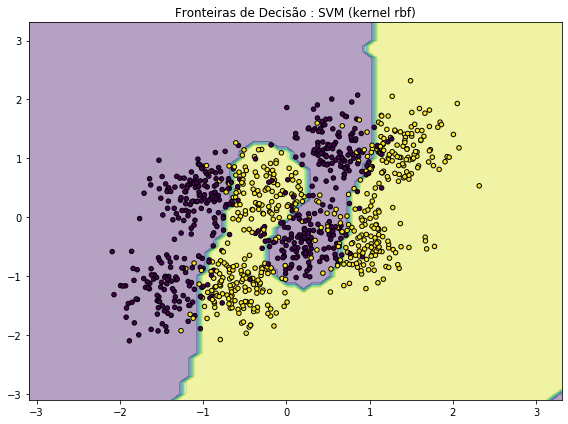

In [45]:
Z = md.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão : SVM (kernel rbf)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Conforme mencionado o kernel *rbf* com *C=5* trouxe uma acurácia próxima (se não, identica ao que uma MLP conseguiu).

Dessa forma é factível concluir que ambos os algoritmos tendem a resolver o problema de forma relativamente igual.

Uma diferença visível que não é apresentada, é o tempo de treinamento de cada algoritmo. No caso do SVM ele tem um tempo de treinamento MUITO inferior ao da MLP (tanto usando scikit-learn quanto Keras).

Além do kernel **rbf**, foi usado para fins de comparação um kernel polinomial com grau 3 (foi usado o mesmo valor de *C=5*).

Abaixo, apresenta-se os resultados.

In [46]:
md = SVC(**{
    "C": 5,
    "gamma": 'scale',
    "kernel": 'poly',
    "degree": 3,
    "random_state": 1
})
md.fit(x_treino, y_treino_view)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Acurácia:
75.9%

Classification report:
              precision    recall  f1-score   support

          C1       0.72      0.83      0.78       499
          C2       0.81      0.68      0.74       501

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000



(1.5, -0.5)

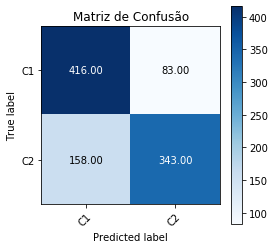

In [47]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

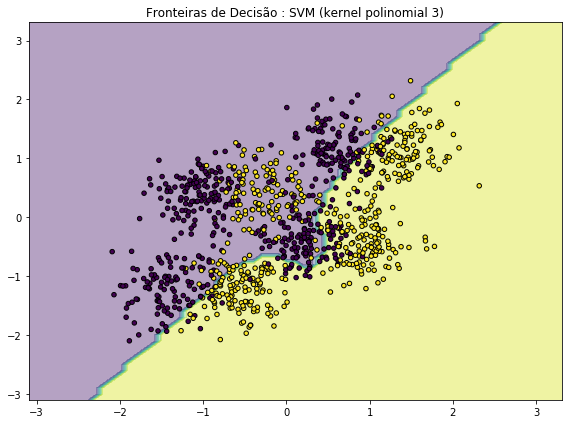

In [48]:
Z = md.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão : SVM (kernel polinomial 3)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

Adicionar mais graus ao kernel polinomial, não necessariamente aumenta a acurácia do modelo. Isso pode ser observado abaixo.

Foi utilizado o mesmo modelo SVM, com a execeção do uso de um polinômio de grau 9.

In [49]:
md = SVC(**{
    "C": 5,
    "gamma": 'scale',
    "kernel": 'poly',
    "degree": 9,
    "random_state": 1
})
md.fit(x_treino, y_treino_view)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Acurácia:
75.1%

Classification report:
              precision    recall  f1-score   support

          C1       0.68      0.95      0.79       499
          C2       0.91      0.56      0.69       501

    accuracy                           0.75      1000
   macro avg       0.80      0.75      0.74      1000
weighted avg       0.80      0.75      0.74      1000



(1.5, -0.5)

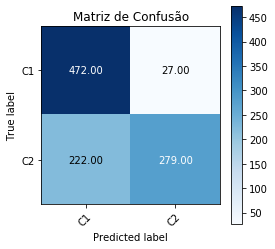

In [50]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

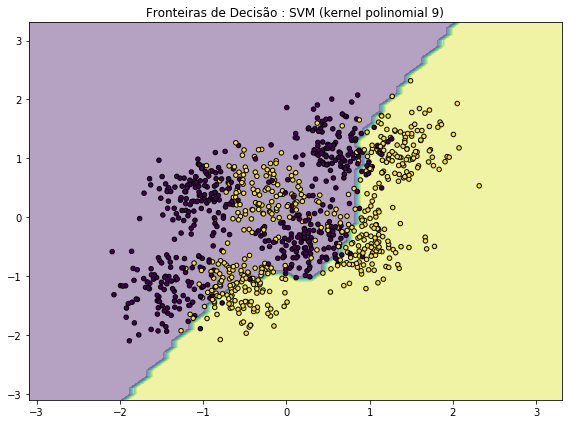

In [51]:
Z = md.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão : SVM (kernel polinomial 9)")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=20, edgecolor='k')
plt.tight_layout()
plt.show()

$~$

### **Considerações gerais**


Percebemos que para o problema proposto, ambos algoritmos tiveram desempenho próximo (em torno de 87~88% de acurácia). A única diferença expressiva que percebemos foi a vantagem no tempo de treinamento do algoritmo SVM em relação a rede MLP.

Especificadamente falando da rede MLP, ficou claro que o aumento no número de camadas e o aumento no número de neurônios das camadas internas não reflete necessariamente na melhoria do resultado final. A rede possui um valor otimizado de neurônios e camadas internas para um determinado problema (no caso apresentado 1 camada com 30 neurônios) e quaisquer valores acima do ótimo representam inserção de ruído e desperdício computacional. Percebemos que a definição de outros hiperparâmetros (como otimizadores) são bem vindos pois colaboram para outros ganhos além da acurácia final, como por exemplo um tempo menor de convergência.

Em relação ao modelo SVM vimos que utilizar o truque do kernel de fato viabiliza o modelo para problemas não lineares, onde os resultados encontrados se assemelham muito com os da rede neural. Assim como na questão da rede neural, o algoritmo também apresenta valores otimizados para o problema proposto e o aumento destes hiperparametros de kernel e regularização além do ótimo não representa melhoria de desempenho.

$~$

### **NOTAS**

 - Uma maneira utilizada para encontrar alguns dos hiperparâmetros utilizados foi executar uma busca exaustiva avaliando diferentes valores. No caso específico a biblioteca scikit-learn possui o método [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), o qual tem a seguinte explicação: ***Exhaustive search over specified parameter values for an estimator.***

 - O algoritmo **Adam** foi usado como otimizador da Rede Neural devido a sua rápida convergência, apesar de ter sido demonstrado que o Gradiente descendente pode ter um menor erro.
   - [On the Convergence of Adam and Beyond](https://arxiv.org/abs/1904.09237)
   - [The Marginal Value of Adaptive Gradient Methods in Machine Learning](https://arxiv.org/abs/1705.08292)

 - A escolha pelo parâmetro de *batch_size=32* vem de um paper indicado pelo **Yann LeCun** ([Friends dont let friends use minibatches larger than 32](https://twitter.com/ylecun/status/989610208497360896)). Entretanto é discutido em outro paper que o decay do batch_size (de algo grande para cada vez menor) pode também ajudar em uma melhor convergência.

$~$
$~$

Anthony Miranda Vieira - 229058

Rodolfo De Nadai - 208911

Todo o código deste relatório esta disponível em: https://github.com/rdenadai/ia006c
